# 粒子フィルタ

　状態空間モデル
\begin{align}
x_t&=\frac{1}{2}x_{t-1}+\frac{25x_{t-1}}{x_{t-1}^2+1}+8\cos(1.2t)+v_t　\\
y_t&=\frac{1}{20}x_{t-1}^2+w_t
\end{align}
に対して，粒子数$N$を変えながら，粒子フィルタのアルゴリズムを適用してみる．

ノイズは，$v_t \sim N(0,0.1)$，$w_t \sim N(0,1)$としておこう．

In [1]:
using Plots

In [2]:
Q =1
R =10

10

In [3]:
T = 100
v = √Q * randn(T,1)
w = √R * randn(T,1)

100×1 Array{Float64,2}:
  1.2876274472469431 
  3.0591607733641517 
  0.25815568730698657
 -0.5577972656942275 
  1.6420390758286252 
 -0.9301880554731433 
  0.9740226338074235 
 -4.421533281382348  
 -2.5057710173582843 
 -1.3172690673516945 
  5.551506504850979  
  0.7022185183802727 
 -3.478755409638304  
  ⋮                  
 -2.6016700124875114 
 -3.302730373237073  
  0.10442186529276339
 -1.9425150592733516 
  5.782299002261874  
  1.0300039988414036 
  0.7162548148327004 
 -1.2115906648860402 
  3.2745053402534157 
 -5.653681630519431  
  0.8129091746941601 
 -3.238155513252954  

In [4]:
f(X,V,t) = 1/2*X + 25*X./((X.^2).+1) + V .+8*cos(1.2*t)
h(X,W) = 1/2*X.^2 + W

h (generic function with 1 method)

In [5]:
x = √5 * randn()
sqx = [x]
for t in 1:T
    x = f(x,v[t],t)
    push!(sqx, x)
end

In [6]:
y = h(sqx[2],w[1])
sqy = [y]
for t in 2:T
    y = h(sqx[t+1],w[t])
    push!(sqy, y)
end

これが観測データ．

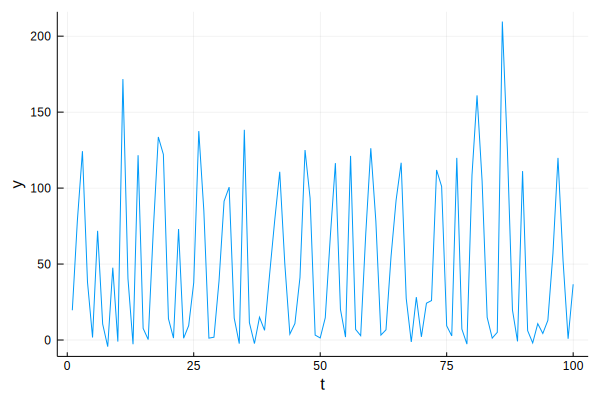

In [7]:
plot([1:T],sqy,leg=false,xlabel="t",ylabel="y")
#savefig("ydata.pdf")

粒子数は$N=200$としておく．

In [8]:
N=200

200

In [9]:
X  = √5 *randn(N,1)
vs = √Q * randn(N,T)
V = 1/(N-1)*sum( (X.-sum(X)/N).^2 )
sqX = [sum(X)/N]
sqV = [V]

1-element Array{Float64,1}:
 4.674969432017498

In [10]:
for t in 1:T
    X = f(X,vs[:,t],t)
    λ=1/√(2*π*R)*exp.(-1/(2*R)*((1/2*(X.^2)).-sqy[t]).^2) #尤度比の計算
    ω=λ/sum(λ)
    u = rand(N)
    list=[]
    for i in 1:N
        for num in 1:N
            if u[i]<=sum(ω[1:num])
                push!(list,num)
                break
            end
        end
    end
    List2=[]
    for i in 1:N
        push!(List2,X[list[i]])
    end
    X=copy(List2)
    push!(sqX,sum(X)/N)
    V = 1/(N-1)*sum( (X.-sum(X)/N).^2 )
    push!(sqV,V)
end

プロットしてみる．青がフィルタ推定値，赤が真値．

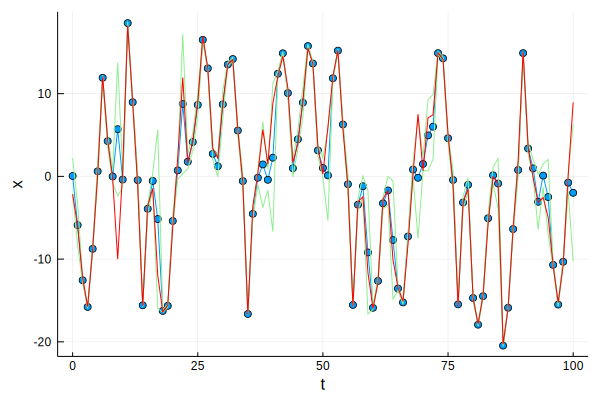

In [11]:
plot([0:T],sqX,leg=false,xlabel="t",ylabel="x",marker=:auto) 
plot!([0:T],sqX + sqV.^(1/2),linecolor=:lightgreen)
plot!([0:T],sqX- sqV.^(1/2),linecolor=:lightgreen)
plot!([0:T],sqx,leg=false,xlabel="t",ylabel="x",linecolor=:red)